# Blip Image captioning with bfloat16

- [Model card](https://huggingface.co/Salesforce/blip-image-captioning-base)
- [Reference / Original Source](https://learn.deeplearning.ai/courses/quantization-fundamentals/lesson/4/loading-models-by-data-type)


In [20]:
import requests
import torch
from IPython.display import display
from PIL import Image
from transformers import AutoProcessor, BlipForConditionalGeneration

In [21]:
model_name = "Salesforce/blip-image-captioning-base"
default_dtype = torch.float32
compact_dtype = torch.bfloat16
torch.set_default_dtype(compact_dtype)
processor = AutoProcessor.from_pretrained(model_name)
model = BlipForConditionalGeneration.from_pretrained(model_name)
torch.set_default_dtype(default_dtype)

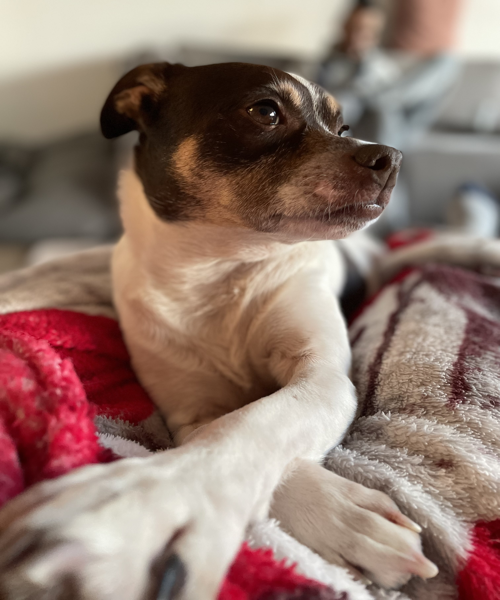

In [22]:
url = "https://secure.btech.software/repo/images/pet_21_04_24.jpeg"
image = Image.open(requests.get(url, stream=True).raw)
display(image.resize((500, 600)))

In [23]:
def get_generation(model, processor, image, dtype):
  inputs = processor(image, return_tensors="pt").to(dtype)
  out = model.generate(**inputs)
  return processor.decode(out[0], skip_special_tokens=True)

In [24]:
results_bf16 = get_generation(model, 
                              processor, 
                              image, 
                              torch.bfloat16)

In [25]:
print(results_bf16)

a small dog laying on a blanket
